<img src=".\images\Logo.png" width=150 align="left" /> <img src=".\images\Logo2.jpg" width=450 align="right" />


# <center><font color= #1e8449 > <b>CU55_Modelo agregado de estimación del gasto medio por turista</font></center>

<font color='steelblue'><b>Citizenlab Data Science Methodology > II - Data Processing Domain </font>
***
> # <font color='steelblue'> <b>11.- ECA - Exploratory Causal Analysis</font>

<font color='steelblue'>Exploratory causal analysis (ECA) is the process of discovering the root causes of problems in order to identify appropriate solutions.</font>

## <font color='steelblue'>Tasks</font>

<font color='steelblue'><b>Define the key challenge or setback</b>
    
<font color='steelblue'><b>Determine the causes and effects of the key challenge</b>
    
<font color='steelblue'><b>Use a diagram or graph to organize information</b>
    
<font color='steelblue'><b>Formulate a response to the primary causes of your challenge</b>
    
<font color='steelblue'><b>Review your process and address new causes and effects</b>



## <font color='green'>File</font>

- <font color='steelblue'> <b>Input File: CU_55_06_03_gasto_municipio.csv</font>
- <font color='steelblue'> <b>Sampled Input File: CU_55_07_03_gasto_municipio.csv</font>
- <font color='steelblue'> <b>Output File: No aplica</font>

### Encoding

Con la siguiente expresión se evitan problemas con el encoding al ejecutar el notebook. Es posible que deba ser eliminada o adaptada a la máquina en la que se ejecute el código.

In [1]:
Sys.setlocale(category = "LC_ALL", locale = "es_ES.UTF-8")

[1] "LC_COLLATE=es_ES.UTF-8;LC_CTYPE=es_ES.UTF-8;LC_MONETARY=es_ES.UTF-8;LC_NUMERIC=C;LC_TIME=es_ES.UTF-8"

## <font color='green'>Settings</font>

### Libraries to use

In [2]:
library(readr)
library(dplyr)
library(tidyr)
library(stringr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




### Paths

In [3]:
iPath <- "Data/Input/"
oPath <- "Data/Output/"

## <font color='green'>Data Load</font>

<font color='tomato'><b> OPCION A:</b> Seleccionar fichero en ventana para mayor comodidad</font> 

Data load using the {tcltk} package. Ucomment the line if using this option

In [4]:
# file_data <- tcltk::tk_choose.files(multi = FALSE)

<font color='tomato'><b> OPCION B:</b> Especificar el nombre de archivo</font>



In [5]:
iFile <- "CU_55_06_03_gasto_municipio.csv"
file_data <- paste0(iPath, iFile)

if(file.exists(file_data)){
    cat("Se leerán datos del archivo: ", file_data)
} else{
    warning("Cuidado: el archivo no existe.")
}


Se leerán datos del archivo:  Data/Input/CU_55_06_03_gasto_municipio.csv

#### Data file to dataframe

Usar la función adecuada según el formato de entrada (xlsx, csv, json, ...)

In [6]:
data <- read_csv(file_data)


Rows: 50294 Columns: 9
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (5): mes, pais_orig_cod, pais_orig, mun_dest, CMUN
dbl (4): mun_dest_cod, turistas, gasto, Target

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


<font color='tomato'>Visualizo los datos.</font>

Estructura de  los datos:

In [7]:
data |> glimpse()

Rows: 50,294
Columns: 9
$ mes           <chr> "2019-07", "2019-07", "2019-07", "2019-07", "2019-07", "…
$ pais_orig_cod <chr> "000", "010", "011", "030", "110", "121", "123", "126", …
$ pais_orig     <chr> "Total", "Total Europa", "Total Unión Europea", "Total A…
$ mun_dest_cod  <dbl> 28002, 28002, 28002, 28002, 28002, 28002, 28002, 28002, …
$ mun_dest      <chr> "Ajalvir", "Ajalvir", "Ajalvir", "Ajalvir", "Ajalvir", "…
$ turistas      <dbl> 338, 290, 268, 37, 56, 54, 37, 40, 157, 116, 109, 8461, …
$ CMUN          <chr> "002", "002", "002", "002", "002", "002", "002", "002", …
$ gasto         <dbl> 86.78, 86.78, 86.78, 86.78, 76.36, 78.92, 93.65, 102.04,…
$ Target        <dbl> 86.78, 86.78, 86.78, 86.78, 76.36, 78.92, 93.65, 102.04,…


Muestra de los primeros datos:

In [8]:
data |> slice_head(n = 5)

mes,pais_orig_cod,pais_orig,mun_dest_cod,mun_dest,turistas,CMUN,gasto,Target
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
2019-07,000,Total,28002,Ajalvir,338,002,86.78,86.78
2019-07,010,Total Europa,28002,Ajalvir,290,002,86.78,86.78
2019-07,011,Total Unión Europea,28002,Ajalvir,268,002,86.78,86.78
2019-07,030,Total América,28002,Ajalvir,37,002,86.78,86.78
2019-07,110,Francia,28002,Ajalvir,56,002,76.36,76.36


##  Exploratory causal analysis

**REFERENCE**
https://bookdown.org/paul/applied-causal-analysis/

<font color='tomato'>Select columns</font>

In [14]:
# Seleccionamos las variables a analizar. 
excluded_cols <- c("is_train", "gasto")
all_cols <- names(data)
cols <- setdiff(all_cols, excluded_cols)

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


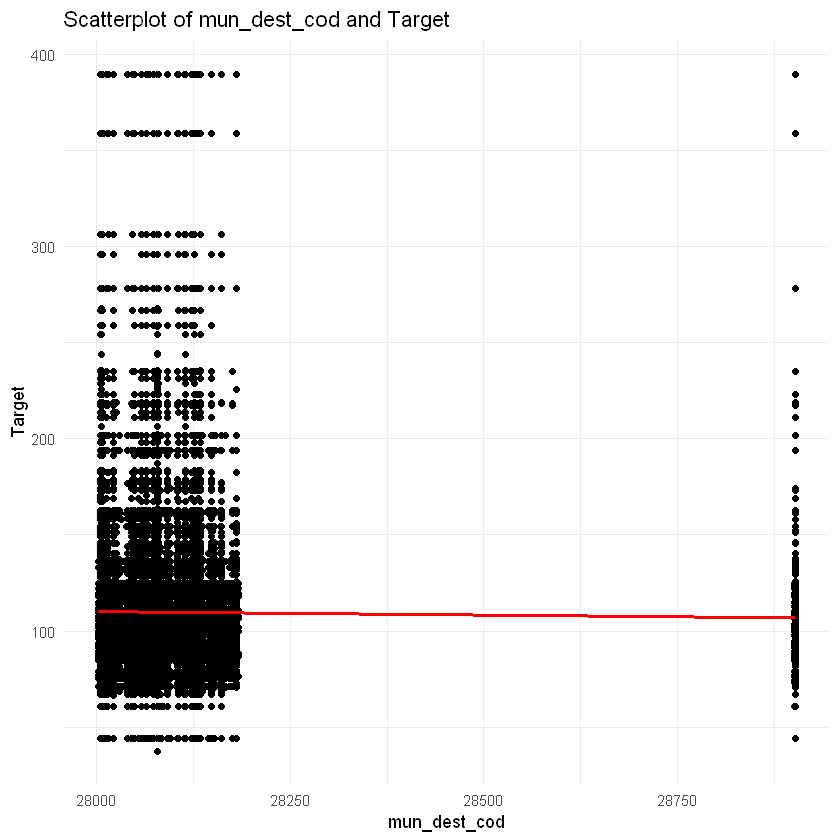

`geom_smooth()` using formula = 'y ~ x'


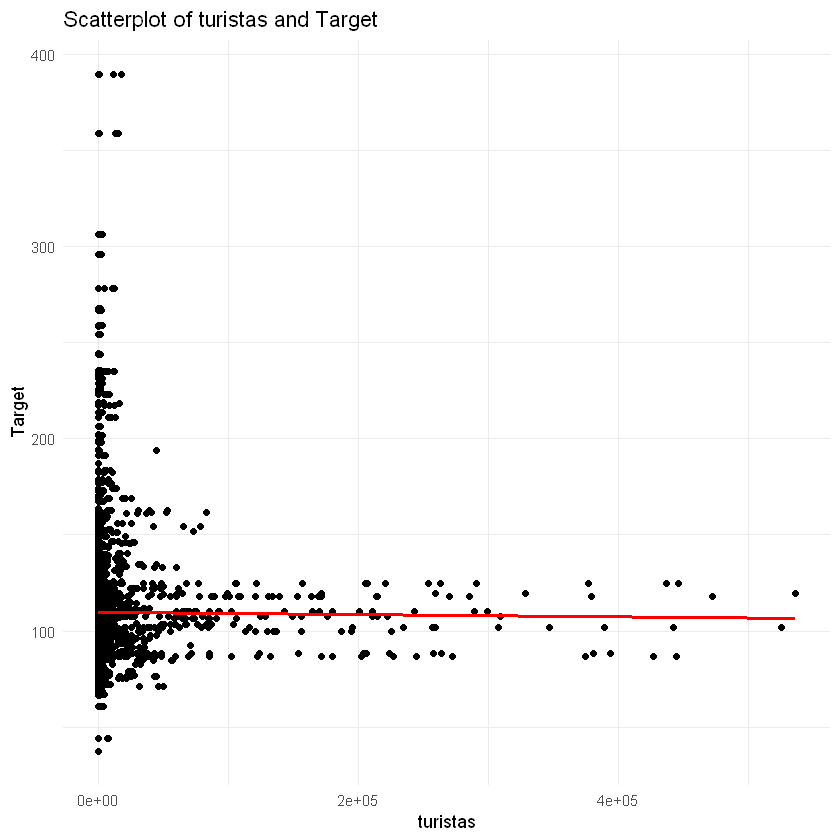

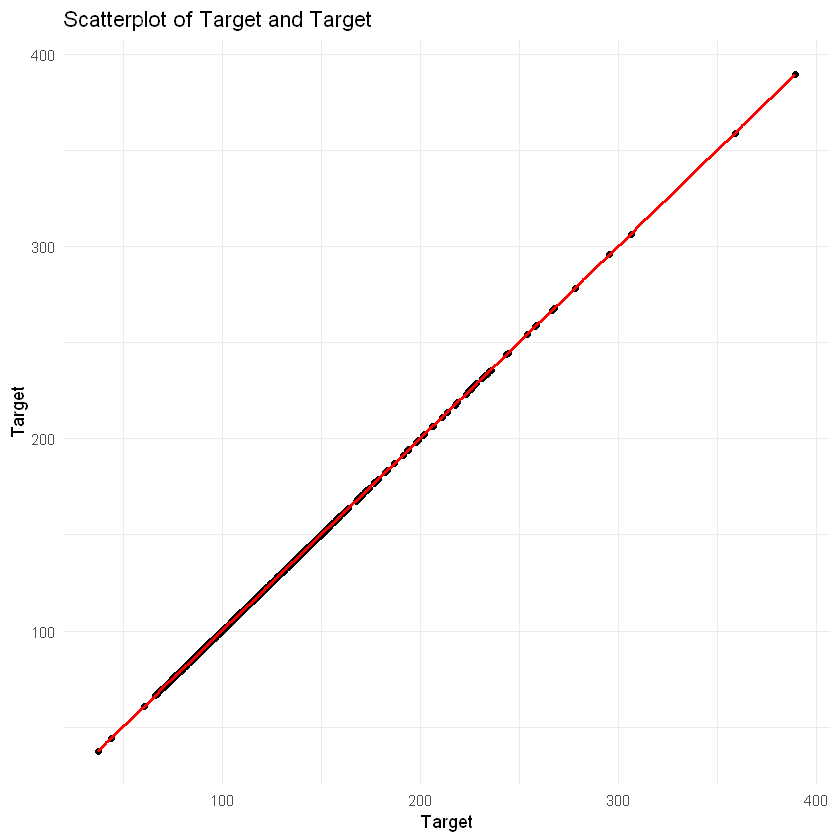

In [13]:
# If not already installed, install the ggplot2 package
if(!require(ggplot2)) install.packages('ggplot2')

# Load the ggplot2 package
library(ggplot2)

# Create scatterplots
for (col in cols) {
  if (is.numeric(data[[col]])) {
    p <- ggplot(data, aes_string(x = col, y = 'Target')) +
      geom_point() +
      geom_smooth(method = "lm", se = FALSE, color = "red") +
      theme_minimal() +
      ggtitle(paste("Scatterplot of", col, "and Target"))
    print(p)
  }
}

Este análisis no aporta información relevante.

## <font color='#2874a6'>REPORT</font>

A continuación se realizará un informe de las acciones realizadas

## <font color=' #2874a6 '>Main Actions Carried Out</font>

- Se ha realizado un análisis causal básico

## <font color=' #2874a6 '>Main Conclusions</font>

- Los datos son adecuados para los modelos que se preveen
